**Input image**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

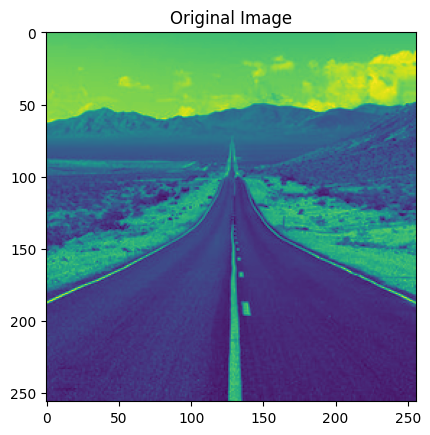

Original Image Shape: (256, 256)


In [9]:
# Importing the Libraries & Loading the Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('road.bmp', cv2.IMREAD_GRAYSCALE)

plt.title('Original Image')
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

print('Original Image Shape:', image.shape)


In this process, the image is accessed in grayscale mode or as a gray image. Subsequently, it is displayed using the plt.imshow function. The imshow() function employs four parameters, which are as follows:

1. Image: This parameter represents the image data.
2. cmap (color Map): To visualize the image in gray, the color mapping is set to gray.
3. vmin: This parameter specifies the minimum data range covered by the colormap.
4. vmax: This parameter defines the maximum data range covered by the colormap.

Finally, the image is exhibited in grayscale.


**Standard Average Filtering**

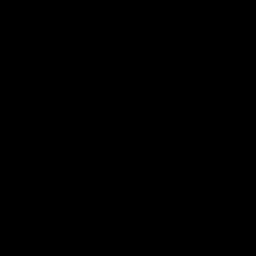

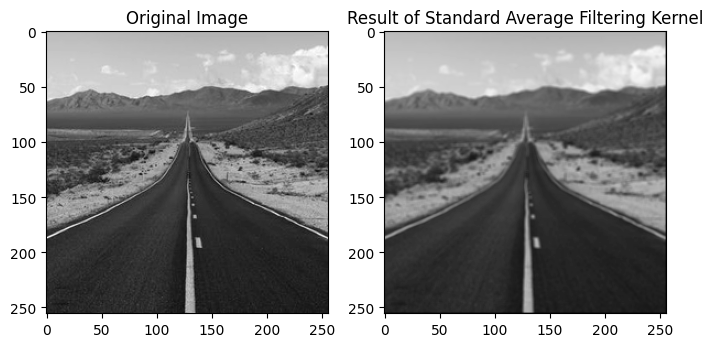

In [13]:
from google.colab.patches import cv2_imshow
#Average filter kernel
kernel = np.ones((3, 3), dtype=np.float32)/9
#padding of original image
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
# Create output image
output_image = np.zeros_like(image)
cv2_imshow(output_image)

#Convolution operation
for i in range(1, padded_image.shape[1]-1):
    for j in range(1, padded_image.shape[1]-1):
        convolution = np.sum(kernel * padded_image[i-1:i+2, j-1:j+2])
        output_image[i-1, j-1] = convolution
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Standard Average Filtering Kernel')

To begin, the image undergoes a filtering process using a 3x3 matrix where all elements are set to 1. This matrix, also known as a mask, is divided by the sum of its elements (9).

Next, we apply padding to the image using the copyMakeBorder function. The function takes several parameters:

1. src: This represents the source image.
2. top: It specifies the border width in pixels at the top.
3. bottom: It indicates the border width in pixels at the bottom.
4. left: It denotes the border width in pixels on the left side.
5. right: It signifies the border width in pixels on the right side.
6. borderType: This parameter determines the type of border to be added, such as cv2.BORDER_CONSTANT or cv2.            BORDER_REFLECT.
7. dest: It refers to the destination image.
8. value: This is an optional parameter that specifies the color of the border if the border type is cv2.BORDER_CONSTANT.

Following that, we proceed with the convolution operation, where each 3x3 matrix is calculated according to the defined process. Each pixel is replaced with the new value obtained from the calculation.

Finally, we obtain the resulting image after applying the standard average filtering kernel.

# Smoothing Spatial Filtering
* Image smoothing filters are applied to reduce the amount of noise in an image.
* This process involves convolution i.e. moving a kernel over the image pixels and computing new values.
1. Weighted Average Filter: Computes the weighted average of
the pixel values in the kernel.
2. Median: Computes the median of all the pixel values in the kernel.
3. Minimum: Selects the least pixel value of all those in the kernel.
4. Maximum: Selects the highest pixel value of all those in the kernel.
5. Mid-Point: Computes the average of the maximum and minimum pixel values in the kernel.

**Now, it's your turn to complete the following filtering operations from 1-5 and explain your thoughts/findings/understandings from the implementation**

1. Weighted Mask


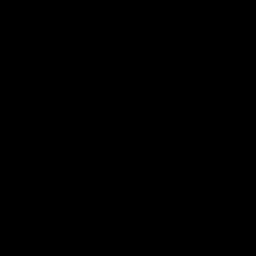

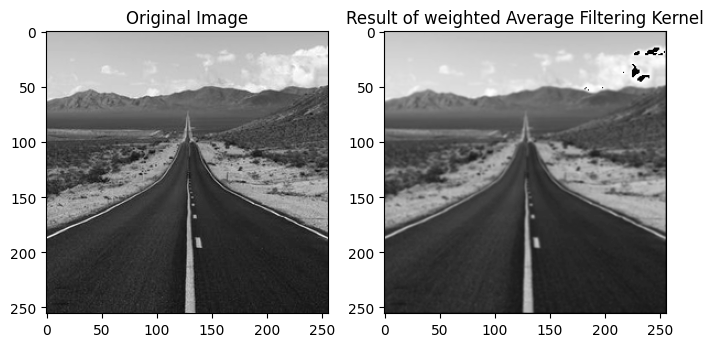

In [15]:

# Weighted mask
kernel = np.array([[1, 2, 1],
                   [2, 4, 3],
                   [1, 2, 1]]) / 16

padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

# Create output image
output_image = np.zeros_like(image)

# Convolution operation
for row in range(1, padded_image.shape[0]-1):
    for col in range(1, padded_image.shape[1]-1):
        convolution = np.sum(kernel * padded_image[row-1:row+2, col-1:col+2])
        output_image[row-1, col-1] = convolution

# Display results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Result of Weighted Average Filtering')
plt.show()


Weighted average filtering involves assigning higher weights to certain pixels. The purpose of this approach is to minimize blurring during the smoothing process. The process remains the same as described earlier.



2. Median


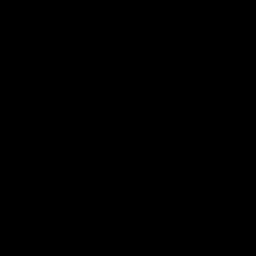

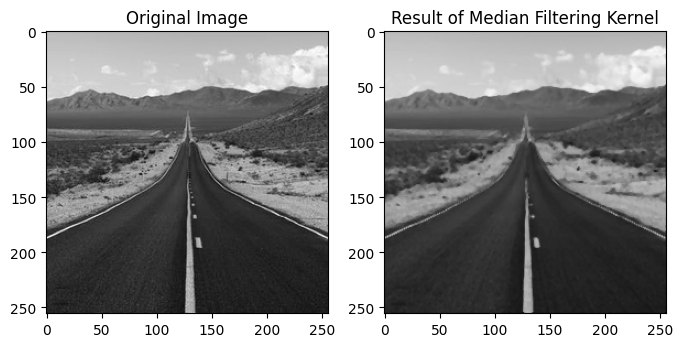

In [26]:
# Median Filtering
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

# Create output image
output_image = np.zeros_like(image)

# Convolution operation
for row in range(1, padded_image.shape[0]-1):
    for col in range(1, padded_image.shape[1]-1):
        convolution = np.median(padded_image[row-1:row+2, col-1:col+2])
        output_image[row-1, col-1] = convolution

# Display results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Result of Median Filtering')
plt.show()

In Non-linear Median filtering, the median value of a 3x3 matrix called "padded_image" is calculated. The median value is then used to replace the middle element (target/padded_image) of the matrix. This process is applied to all pixels of the original image, taking into account the previously added padding.


3. Minimum


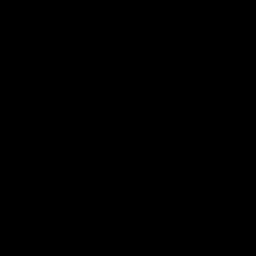

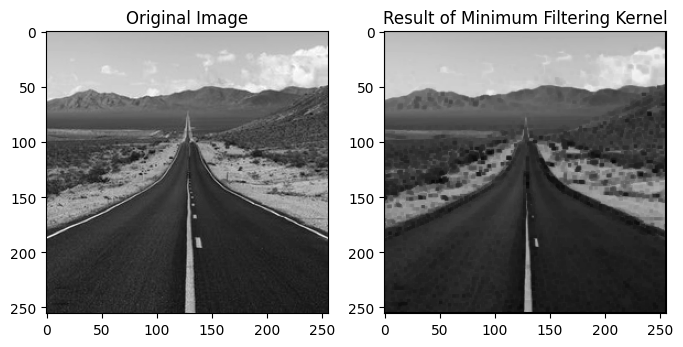

In [22]:
# Minimum Filtering
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

# Create output image
output_image = np.zeros_like(image)

# Convolution operation
for row in range(1, padded_image.shape[0]-1):
    for col in range(1, padded_image.shape[1]-1):
        convolution = np.min(padded_image[row-1:row+2, col-1:col+2])
        output_image[row-1, col-1] = convolution

# Display results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Result of Minimum Filtering')
plt.show()


In Non-linear Minimum filtering, the minimum value of a 3x3 matrix called "padded_image" is calculated. The minimum value is then used to replace the middle element (target/padded_image) of the matrix. This operation is performed for all pixels of the original image, taking into account the previously added padding.


4. Maximum


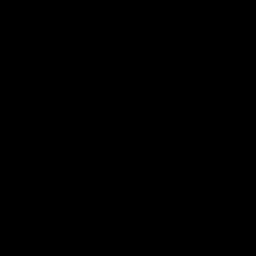

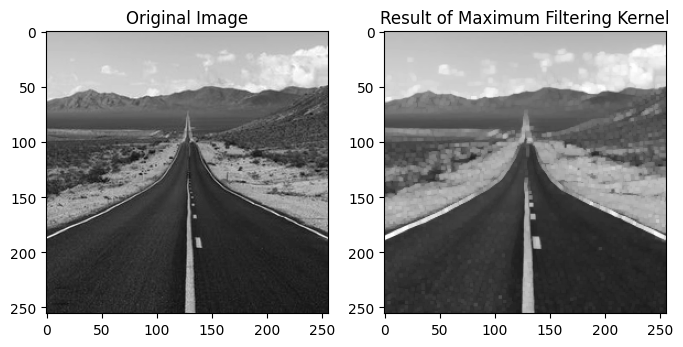

In [27]:

# Maximum Filtering
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

# Create output image
output_image = np.zeros_like(image)

# Convolution operation
for row in range(1, padded_image.shape[0]-1):
    for col in range(1, padded_image.shape[1]-1):
        convolution = np.max(padded_image[row-1:row+2, col-1:col+2])
        output_image[row-1, col-1] = convolution

# Display results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Result of Maximum Filtering')
plt.show()


The Non-linear Maximum filtering kernel involves determining the maximum value within a selected 3x3 matrix named "padded_image." Subsequently, the middle element (target/padded_image) of the matrix is replaced with the maximum value. As padding has been applied to the image, this operation is carried out for all pixels in the original image.

5. Mid-point

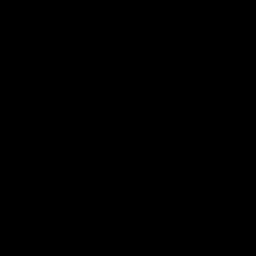

<ipython-input-29-694dd52b76b4>:12: RuntimeWarning: overflow encountered in ubyte_scalars
  convolution=(convolution_1+convolution_2)/2


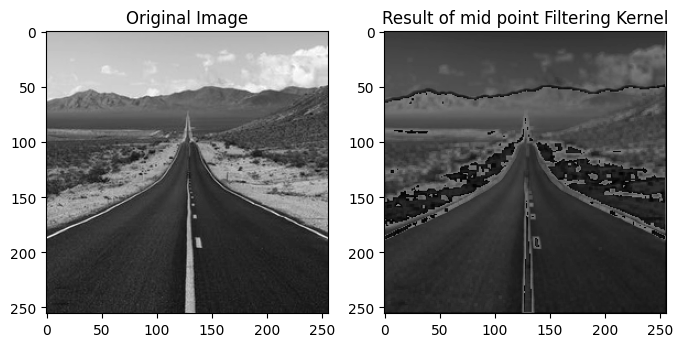

In [29]:
# Mid-Point Filtering
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

# Create output image
output_image = np.zeros_like(image)

# Convolution operation
for row in range(1, padded_image.shape[0]-1):
    for col in range(1, padded_image.shape[1]-1):
        convolution_1 = np.min(padded_image[row-1:row+2, col-1:col+2])
        convolution_2 = np.max(padded_image[row-1:row+2, col-1:col+2])
        convolution = (convolution_1 + convolution_2) / 2
        output_image[row-1, col-1] = convolution

# Display results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Result of Mid-Point Filtering')
plt.show()

In Non-linear Midpoint filtering, we begin by calculating the minimum and maximum values within a selected 3x3 matrix known as "padded_image." Next, we compute the midpoint by taking the average of the minimum and maximum values (midpoint = (minimum + maximum) / 2). The middle element (target/padded_image) of the matrix is then replaced with the calculated midpoint value. This operation is performed for all pixels in the original image, taking into account the previously added padding.